### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

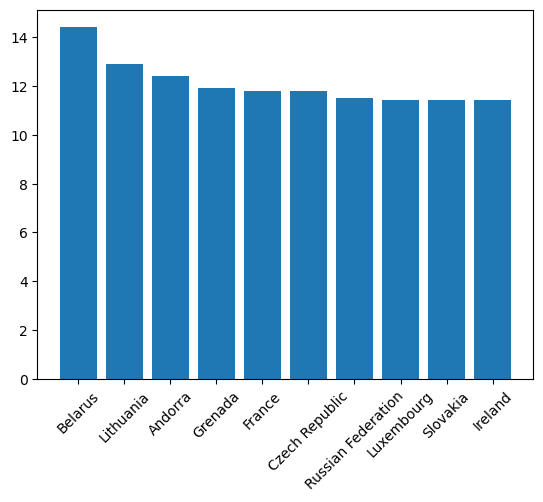

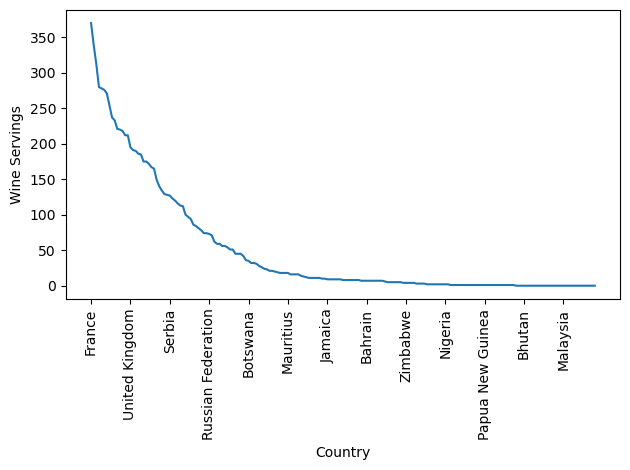

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

#1)
best_countries_alcohol = df.sort_values(by="total_litres_of_pure_alcohol", ascending=False).head(10)

#2)
beer_average = df["beer_servings"].mean()
wine_average = df["wine_servings"].mean()
spirit_average = df["spirit_servings"].mean()

#3)
df["alcohol_index"] = (df["beer_servings"] + df["wine_servings"] + df["spirit_servings"]) / 3

#4)
best_country_idxAlcohol = df.sort_values(by="alcohol_index", ascending=False).head(1)

#5)
most_beers = df[df["beer_servings"] > 100]

#6)
labes = df.sort_values(by="total_litres_of_pure_alcohol", ascending=False).iloc[:10]["country"]
values = df.sort_values(by="total_litres_of_pure_alcohol", ascending=False).iloc[:10]["total_litres_of_pure_alcohol"]
plt.bar(labes, values)
plt.xticks(rotation=45)
plt.show()

#7)
labes = df.sort_values(by="wine_servings", ascending=False)["country"]
values = df.sort_values(by="wine_servings", ascending=False)["wine_servings"]

plt.plot(labes, values)
plt.xlabel('Country')
plt.ylabel('Wine Servings')
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::15])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

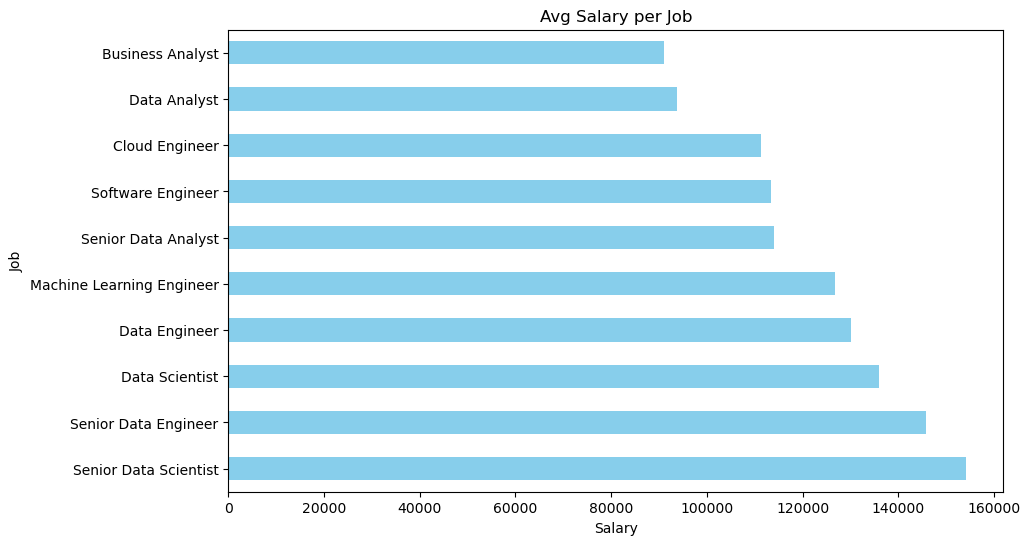

In [4]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

#1)
avg_salary_country = df.groupby("job_country")["salary_year_avg"].mean()

#2)
job_count_by_country = df.groupby("job_country")["job_title_short"].count()

#3)
range_salary = df.groupby("job_country")["salary_year_avg"].agg(lambda x: [x.min(), x.max()]).tolist()

#4)
avg_salary_job = df.groupby("job_title_short")["salary_year_avg"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_salary_job.plot(kind='barh', color='skyblue')
plt.title("Avg Salary per Job")
plt.xlabel("Salary")
plt.ylabel("Job")
plt.show()